In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

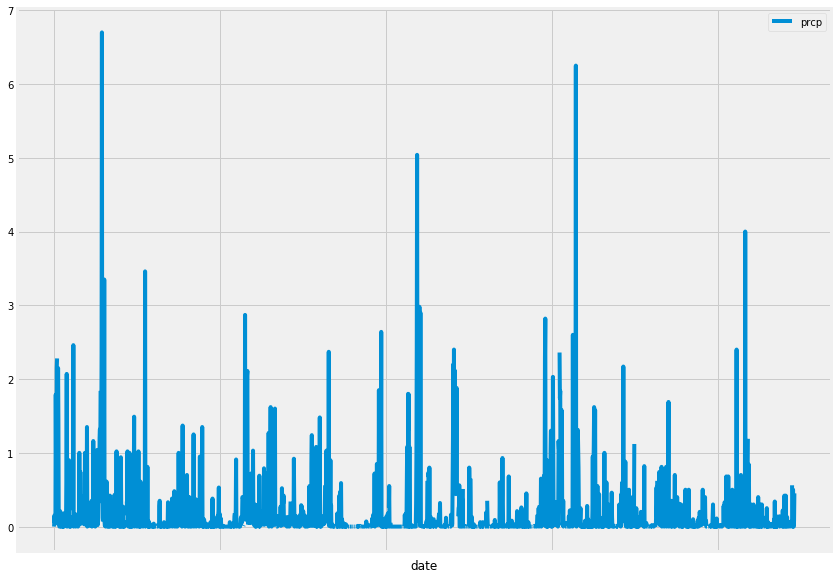

In [73]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# yearAgo = dt.date(2017, 8 ,23) - dt.timedelta(days=365)

# last12mon = session.query(Measurement.prcp,Measurement.date).filter(Measurement.date >= yearAgo).order_by(Measurement.date).all()
# last12mon_df = pd.DataFrame(last12mon)
legend='Precipitation'
# fig, ax = subplots()
# ax.legend([Precipitation])
last12mon_df.plot(figsize=(13,10),x='date',legend=legend)
plt.show()

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [54]:
last12mon_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [55]:
# Design a query to show how many stations are available in this dataset?
nbrStations = session.query(func.count(Station.id)).all()
nbrStations

[(9)]

In [56]:
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [57]:
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    group_by(Measurement.station).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


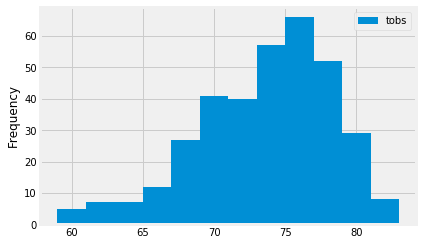

In [59]:
st = session.query(Measurement.tobs).filter(Measurement.date > yearAgo).filter(Measurement.station=='USC00519281').all()
st_df = pd.DataFrame(st)
st_df.plot.hist(bins=12)

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [80]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-20', '2012-02-28'))

[(64.0, 70.8695652173913, 77.0)]


In [82]:
temps = calc_temps('2017-02-20','2017-03-28' )
temps_df = pd.DataFrame(temps, columns=['min','avg','max'])
temps

[(61.0, 71.53097345132744, 82.0)]

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


<BarContainer object of 1 artists>

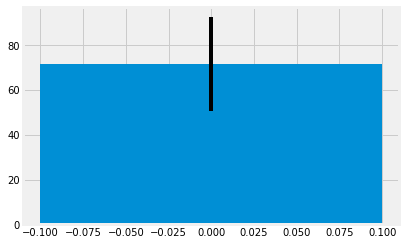

In [83]:
#temps_df.plot(kind='bar',y=temps_df['avg'],yerr=(temps_df['max']-temps_df['min']),title="Trip Avg Temp")
yerr = temps_df['max']-temps_df['min']
y = temps_df["avg"]

plt.bar(0,y,width=0.2, yerr=yerr,align='center')

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [84]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, func.sum(Measurement.prcp),Station.latitude, Station.longitude,Station.elevation]
same_sporder = session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date >= '2017-02-20').\
    filter(Measurement.date <= '2017-02-28').group_by(Measurement.station).all()

for record in same_sporder:
    (Measurement_station, Measurement_prcp, lat, lon,elev) = record
    print(record)

('USC00513117', 0.22, 21.4234, -157.8015, 14.6)
('USC00514830', 0.15, 21.5213, -157.8374, 7.0)
('USC00516128', 1.0899999999999999, 21.3331, -157.8025, 152.4)
('USC00517948', 0.17, 21.3934, -157.9751, 11.9)
('USC00519281', 0.1, 21.45167, -157.84888999999998, 32.9)
('USC00519397', 0.16, 21.2716, -157.8168, 3.0)
('USC00519523', 0.13, 21.33556, -157.71139, 19.5)


## Optional Challenge Assignment

In [85]:
daily_normals("02-20")

[(63.0, 70.14035087719299, 76.0)]

In [79]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
startDate = '2017-02-20'
endDate = '2017-02-28'
# Use the start and end date to create a range of dates


# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


In [ ]:
#junk catcher. Please do not execute

#session.execute("select prcp from measurement where date > dt.timedelta(days)")
#query_date = dt.date(2011, 4, 8) - dt.timedelta(days=7)
#(x=last12mon_df["date"],y=last12mon_df["prcp"], kind="bar")
#x_axis = last12mon_df["date"]
#y_axis = last12mon_df["prcp"]
#last12mon
#fr = session.query(func.sum(Measurement.prcp),Measurement.station).filter(Measurement.date >= '2017-02-28').\
#    filter(Measurement.date <= '2017-03-05').group_by(Measurement.station)
#q = session.query(Measurement).join(Station, Measurement.station == Station.station)
q = session.query(Measurement.station,Station.name,Station.latitude,Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
    join(Station, Measurement.station == Station.station).group_by(Measurement.station).order_by(func.sum(Measurement.prcp))
for row in q:
    print(row)